11490434/11490434 [==============================] - 9s 1us/step
Epoch 1/5
844/844 [==============================] - 4s 4ms/step - loss: 0.2953 - accuracy: 0.9153 - val_loss: 0.1292 - val_accuracy: 0.9645
Epoch 2/5
844/844 [==============================] - 3s 4ms/step - loss: 0.1191 - accuracy: 0.9642 - val_loss: 0.0954 - val_accuracy: 0.9718
Epoch 3/5
844/844 [==============================] - 4s 4ms/step - loss: 0.0799 - accuracy: 0.9763 - val_loss: 0.0811 - val_accuracy: 0.9768
Epoch 4/5
844/844 [==============================] - 3s 3ms/step - loss: 0.0609 - accuracy: 0.9813 - val_loss: 0.0836 - val_accuracy: 0.9750
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9758
Test accuracy: 0.9757999777793884
1/1 [==============================] - 0s 84ms/step


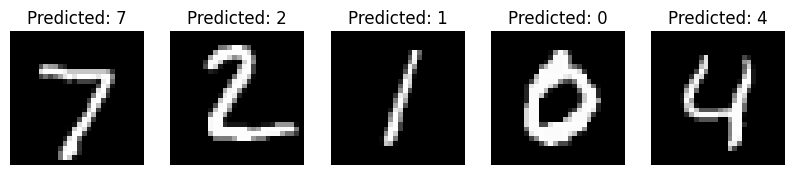

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
class NeuralNetwork:
    def __init__(self, input_shape, num_classes):
        self.model = self.build_model(input_shape, num_classes)
    def build_model(self, input_shape, num_classes):
        model = models.Sequential()
        model.add(layers.Flatten(input_shape=input_shape))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(num_classes, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def train(self, train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1):
        history = self.model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
        return history
    def evaluate(self, test_images, test_labels):
        return self.model.evaluate(test_images, test_labels)
    def predict(self, images):
        return self.model.predict(images)
input_shape = (28, 28, 1)
num_classes = 10
nn = NeuralNetwork(input_shape, num_classes)
history = nn.train(train_images, train_labels, epochs=5)
test_loss, test_acc = nn.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
predictions = nn.predict(test_images[:5])
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i, :, :, 0], cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions[i])}')
    plt.axis('off')
plt.show()
